<h2 style='color:blue';>Customer Churn Prediction Using Artificial Neural Network (ANN)</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
511,8535-SFUTN,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15,No
5925,1840-BIUOG,Male,0,No,No,20,Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,68.70,1416.2,No
1791,2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,Yes,Mailed check,61.50,2722.2,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
categorical_col=[]
continous_col=[]
for col in df.columns:
    print('====================================')
    print(f'{col}:{df[col].unique()}')
    if len(df[col].unique())<=10:
        categorical_col.append(col)
    else:
        continous_col.append(col)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#pd.to_numeric(df.TotalCharges)

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape # checking howmany records are present with empty strings

(7032, 20)

### Remove rows with space in TotalCharges

In [15]:
df1=df[df.TotalCharges!=' ']

In [16]:
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\1462773625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [19]:
df1['TotalCharges'].dtype

dtype('float64')

In [20]:
df1.duplicated().sum()

22

In [21]:
df1.drop_duplicates(inplace=True)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [22]:
df1.duplicated().sum()

0

### Data Visualization

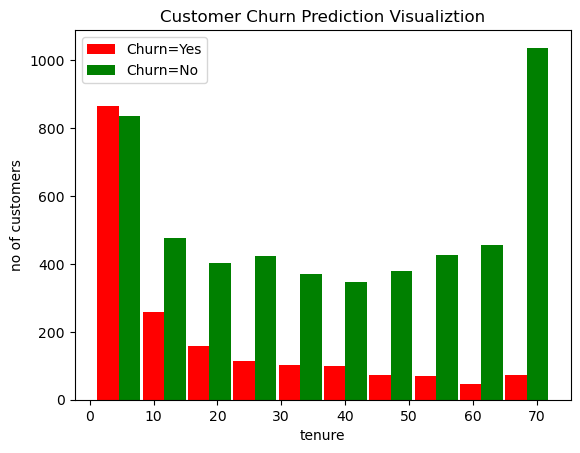

In [23]:
tenure_churn_no=df1[df1['Churn']=='No'].tenure
tenure_churn_yes=df1[df1['Churn']=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('no of customers')
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

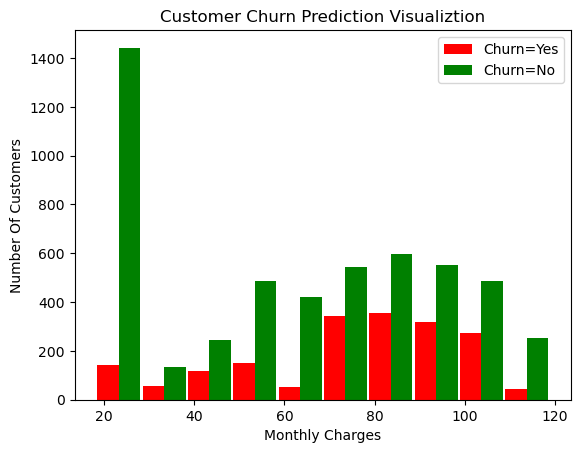

In [24]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

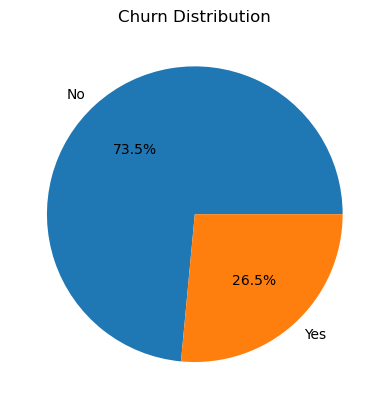

In [25]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame
churn_counts = df1['Churn'].value_counts()

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Distribution')

plt.show()


Here, we can clearly observe imbalance in the data where maximum number customers are not churn. This need to corrected using sampling techniques before feeding into predictive models.

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\777806346.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(method = 'spearman'), annot = True, cmap = 'coolwarm')


<Axes: >

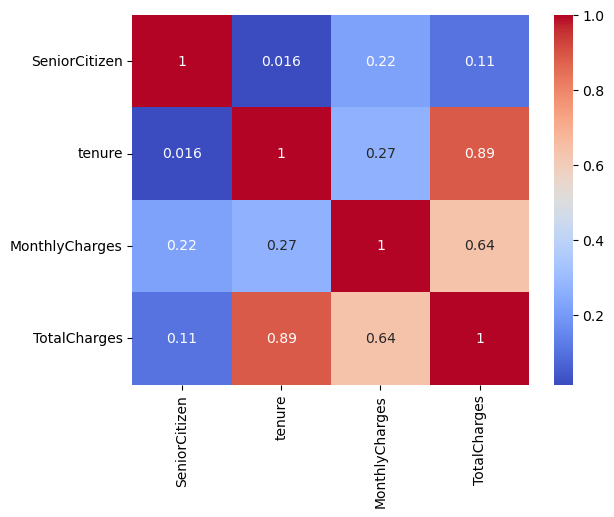

In [26]:
# Correlation matrix for Spearman's Rank Correlation
import seaborn as sns
sns.heatmap(df1.corr(method = 'spearman'), annot = True, cmap = 'coolwarm')

In [27]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
for column_name in categorical_col:
    unique_values = df1[column_name].unique()
    print(f'"{column_name}": {unique_values}')


"gender": ['Female' 'Male']
"SeniorCitizen": [0 1]
"Partner": ['Yes' 'No']
"Dependents": ['No' 'Yes']
"PhoneService": ['No' 'Yes']
"MultipleLines": ['No phone service' 'No' 'Yes']
"InternetService": ['DSL' 'Fiber optic' 'No']
"OnlineSecurity": ['No' 'Yes' 'No internet service']
"OnlineBackup": ['Yes' 'No' 'No internet service']
"DeviceProtection": ['No' 'Yes' 'No internet service']
"TechSupport": ['No' 'Yes' 'No internet service']
"StreamingTV": ['No' 'Yes' 'No internet service']
"StreamingMovies": ['No' 'Yes' 'No internet service']
"Contract": ['Month-to-month' 'One year' 'Two year']
"PaperlessBilling": ['Yes' 'No']
"PaymentMethod": ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
"Churn": ['No' 'Yes']


In [29]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [30]:
for column_name in categorical_col:
    unique_values = df1[column_name].unique()
    print(f'"{column_name}": {unique_values}')


"gender": ['Female' 'Male']
"SeniorCitizen": [0 1]
"Partner": ['Yes' 'No']
"Dependents": ['No' 'Yes']
"PhoneService": ['No' 'Yes']
"MultipleLines": ['No' 'Yes']
"InternetService": ['DSL' 'Fiber optic' 'No']
"OnlineSecurity": ['No' 'Yes']
"OnlineBackup": ['Yes' 'No']
"DeviceProtection": ['No' 'Yes']
"TechSupport": ['No' 'Yes']
"StreamingTV": ['No' 'Yes']
"StreamingMovies": ['No' 'Yes']
"Contract": ['Month-to-month' 'One year' 'Two year']
"PaperlessBilling": ['Yes' 'No']
"PaymentMethod": ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
"Churn": ['No' 'Yes']


In [31]:
yes_no_col=[col for col in df.columns if df[col].eq('Yes').any() or df[col].eq('No').any()]

In [32]:
yes_no_col

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

### Preprocessing

In [33]:
for col in yes_no_col:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\1353649755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_11932\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [36]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [37]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [39]:
continous_col

['tenure', 'MonthlyCharges', 'TotalCharges']

### Scaling features

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[continous_col] = scaler.fit_transform(df2[continous_col])

In [41]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [42]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


### Train and test

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [44]:
X_train.shape

(5608, 26)

In [45]:
X_test.shape

(1402, 26)

In [46]:
len(X_train.columns)

26

In [47]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
176/176 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.7630
Epoch 2/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7932
Epoch 3/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7980
Epoch 4/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8058
Epoch 5/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8046
Epoch 6/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8047
Epoch 7/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8080
Epoch 8/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8090
Epoch 9/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8096
Epoch 10/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4026 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8324
Epoch 82/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8352
Epoch 83/150
176/176 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8331
Epoch 84/150
176/176 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8345
Epoch 85/150
176/176 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8345
Epoch 86/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8343
Epoch 87/150
176/176 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8333
Epoch 88/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8370
Epoch 89/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8358
Epoch 90/150
176/176 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 

In [48]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7575


[0.5266454219818115, 0.7574893236160278]

In [49]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.01441241],
       [0.06540413],
       [0.72878474],
       [0.00267589],
       [0.48448667]], dtype=float32)

In [50]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [52]:
y_test[:10]

9       0
5693    0
1189    0
3827    0
40      0
6140    0
6142    1
1049    1
1719    0
6067    0
Name: Churn, dtype: int64

In [53]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1014
           1       0.58      0.47      0.52       388

    accuracy                           0.76      1402
   macro avg       0.69      0.67      0.68      1402
weighted avg       0.75      0.76      0.75      1402



Text(95.72222222222221, 0.5, 'Truth')

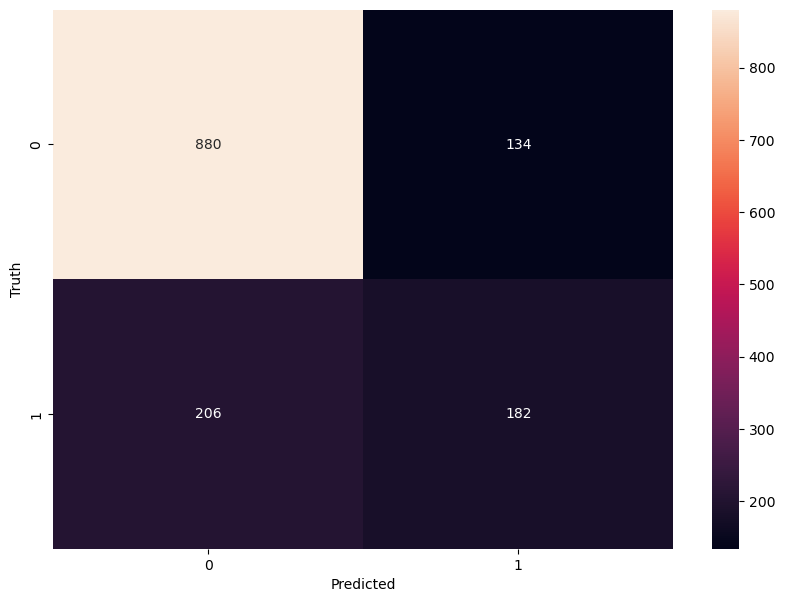

In [54]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [55]:
round((891+169)/(891+219+123+169),2)

0.76

#### Precision for 0 class. i.e. Precision for customers who did not churn

In [56]:
round(891/(891+219),2)

0.8

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [57]:
round(169/(169+123),2)

0.58

#### Recall for 0 class

In [58]:
round(891/(891+123),2)

0.88

#### Recall for 1 class

In [59]:
round(169/(169+219),2)

0.44

In [60]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

### Mitigating Skewdness of Data

#### Method 1: Undersampling

In [62]:
count_class_0,count_class_1=df2.Churn.value_counts()

In [63]:
count_class_0,count_class_1

(5153, 1857)

In [68]:
#divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [74]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print('Random under sampling')
df_test_under.Churn.value_counts()

Random under sampling


0    1857
1    1857
Name: Churn, dtype: int64

In [75]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [77]:
X_train.shape

(2971, 26)

In [78]:
y_train.shape

(2971,)

In [82]:
y_train.value_counts()

0    1486
1    1485
Name: Churn, dtype: int64

In [83]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
93/93 [==============================] - 1s 2ms/step - loss: 0.6183 - accuracy: 0.6927
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7476
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.7563
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7587
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7647
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7617
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7607
Epoch 8/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7634
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7667
Epoch 10/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7657
Epoch 11/

93/93 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8105
Epoch 84/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8132
Epoch 85/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8149
Epoch 86/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8152
Epoch 87/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8152
Epoch 88/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8132
Epoch 89/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8206
Epoch 90/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8189
Epoch 91/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8186
Epoch 92/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8189
Epoch 93/100


### Method2: Oversampling

In [85]:
df_class_0.shape,df_class_1.shape

((5153, 27), (1857, 27))

In [91]:
df_class_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_over,df_class_0])

print('Random sampling')
df_test_over.Churn.value_counts()

Random sampling


1    5153
0    5153
Name: Churn, dtype: int64

In [92]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [93]:
X_train.shape

(8244, 26)

In [94]:
y_train.value_counts()

0    4122
1    4122
Name: Churn, dtype: int64

In [95]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
258/258 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7215
Epoch 2/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7675
Epoch 3/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.7720
Epoch 4/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4743 - accuracy: 0.7755
Epoch 5/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.7769
Epoch 6/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4676 - accuracy: 0.7786
Epoch 7/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.7824
Epoch 8/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7796
Epoch 9/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4603 - accuracy: 0.7792
Epoch 10/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4576 - accura

258/258 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8316
Epoch 82/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8331
Epoch 83/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8345
Epoch 84/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8331
Epoch 85/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8336
Epoch 86/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3702 - accuracy: 0.8364
Epoch 87/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3685 - accuracy: 0.8350
Epoch 88/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8356
Epoch 89/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8354
Epoch 90/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 

### Method3: SMOTE

In [96]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [98]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE resampler
smote = SMOTE(sampling_strategy='minority')

# Use fit_resample to apply SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5153
1    5153
Name: Churn, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [100]:
# Number of classes in training Data
y_train.value_counts()

0    4122
1    4122
Name: Churn, dtype: int64

In [101]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
258/258 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.7468
Epoch 2/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7784
Epoch 3/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7853
Epoch 4/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.7848
Epoch 5/100
258/258 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7883
Epoch 6/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.7910
Epoch 7/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.7960
Epoch 8/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.7974
Epoch 9/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8019
Epoch 10/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4251 - accura

258/258 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8578
Epoch 82/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8538
Epoch 83/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.8566
Epoch 84/100
258/258 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.8576
Epoch 85/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8536
Epoch 86/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8553
Epoch 87/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8561
Epoch 88/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8586
Epoch 89/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8582
Epoch 90/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 